<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Image_MLP%EC%99%80_CNN_%EB%AA%A8%EB%8D%B8_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

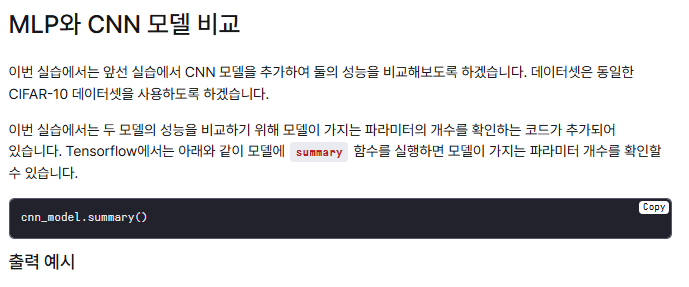

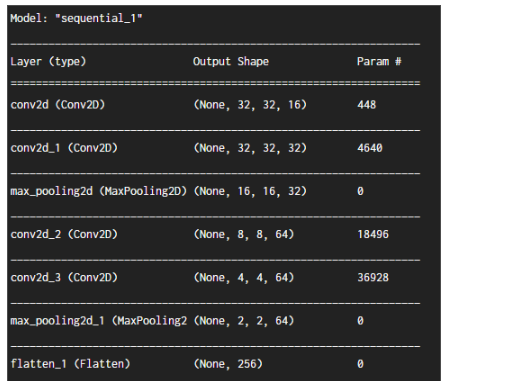

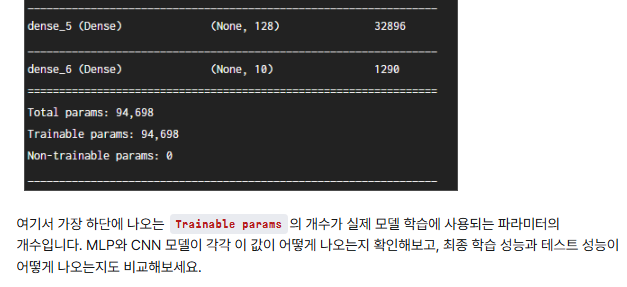

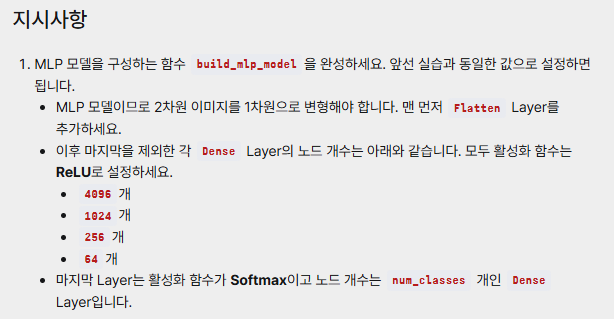

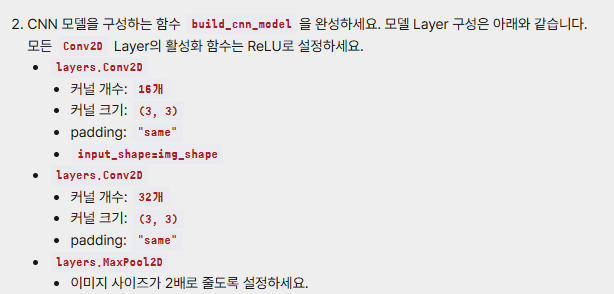

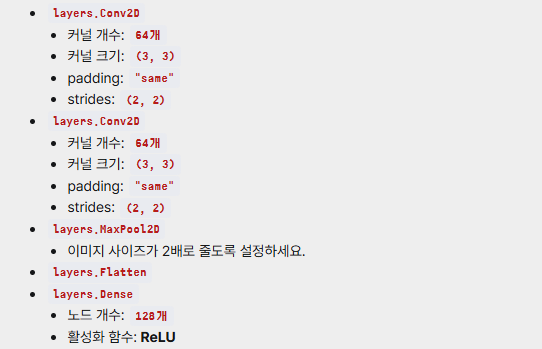

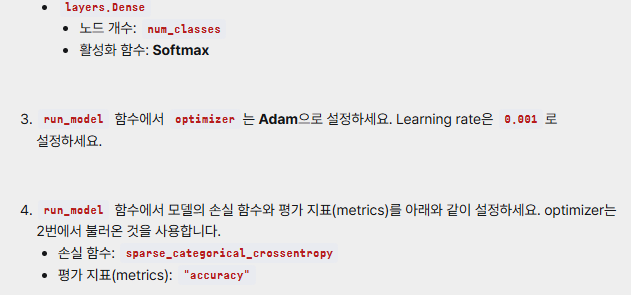

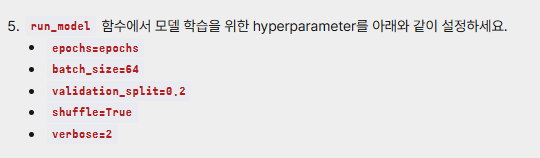

In [ ]:
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load("./dataset/cifar10_train_X.npy")
    train_y = np.load("./dataset/cifar10_train_y.npy")
    test_X = np.load("./dataset/cifar10_test_X.npy")
    test_y = np.load("./dataset/cifar10_test_y.npy")

    train_X, test_X = train_X / 255.0, test_X / 255.0

    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))

    # TODO: [지시사항 1번] MLP 모델을 완성하세요.
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))


    return model

def build_cnn_model(img_shape, num_classes=10):
    model = Sequential()

    # TODO: [지시사항 2번] CNN 모델을 완성하세요.
    model.add(layers.Conv2D(16, kernel_size=(3,3), padding="same", input_shape=(img_shape), activation="relu"))
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(2)) # pool_size 와, strides를 (2,2) 로 하면 2배로 줄어든다. strides 안써주면 pool_size 를 따라간다. pool_size=2 라고 해도 동일. 그리고 MaxPool2D() 에서 pool_size 가 첫번째 파라미터 라서 MaxPool2D(2) 라고 해도 동일.
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", strides=(2,2), activation="relu")) # stride로 인해 한번에 2칸씩 이동 따라서 이미지 사이즈가 가로세로 2배씩 줄어든 효과와 동일하다.
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", strides=(2,2), activation="relu"))
    model.add(layers.MaxPool2D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))

    return model

def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]

    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    elice_utils.send_image("loss.png")

    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")
    elice_utils.send_image("accuracy.png")

def run_model(model, train_X, train_y, test_X, test_y, epochs=10):
    # TODO: [지시사항 3번] Adam optimizer를 설정하세요.
    optimizer = Adam(learning_rate=0.001)

    model.summary()
    # TODO: [지시사항 4번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=0.2, verbose=2)

    plot_history(hist)
    test_loss, test_acc = model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))

    return optimizer, hist

def main():
    tf.random.set_seed(SEED)
    np.random.seed(SEED)

    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape

    mlp_model = build_mlp_model(img_shape)
    cnn_model = build_cnn_model(img_shape)

    print("=" * 30, "MLP 모델", "=" * 30)
    run_model(mlp_model, train_X, train_y, test_X, test_y)

    print()
    print("=" * 30, "CNN 모델", "=" * 30)
    run_model(cnn_model, train_X, train_y, test_X, test_y)

if __name__ == "__main__":
    main()

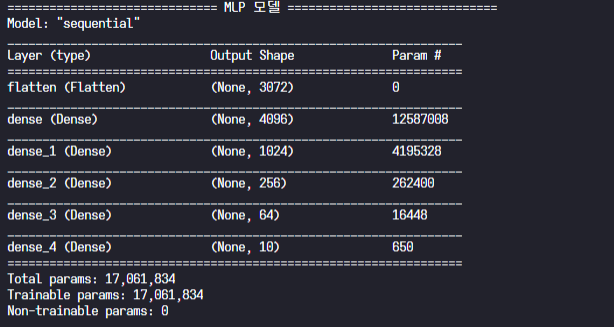

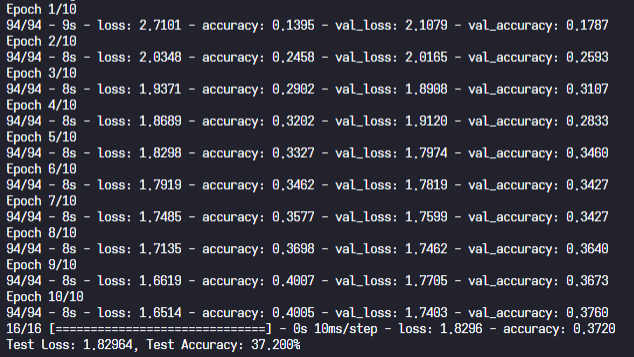

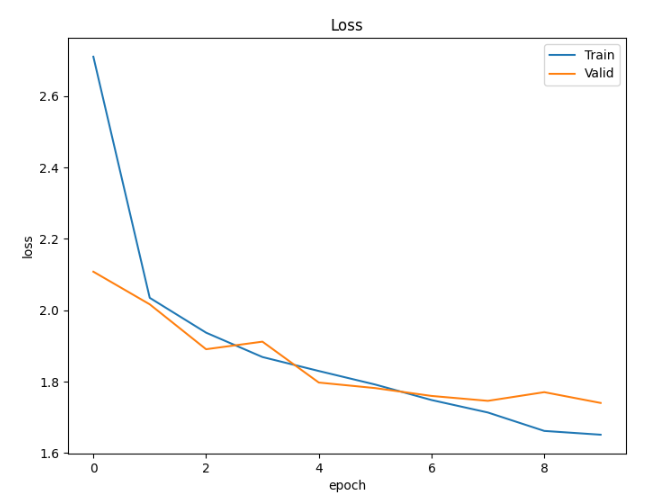

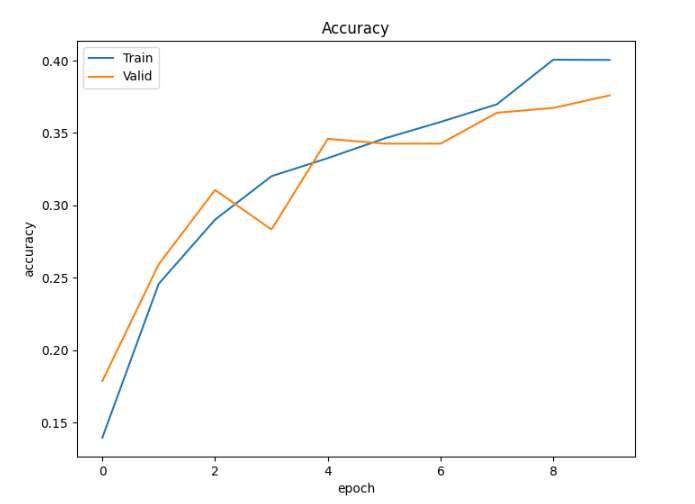

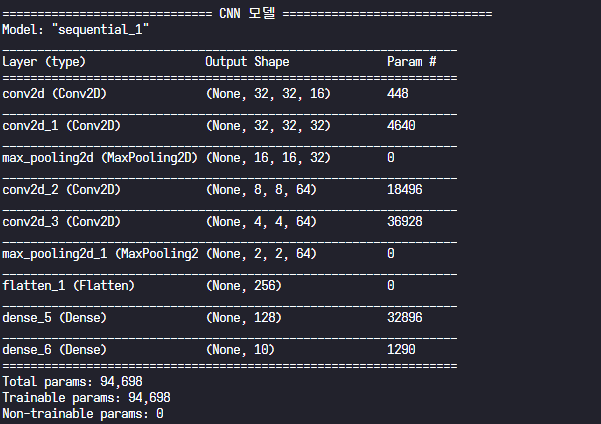

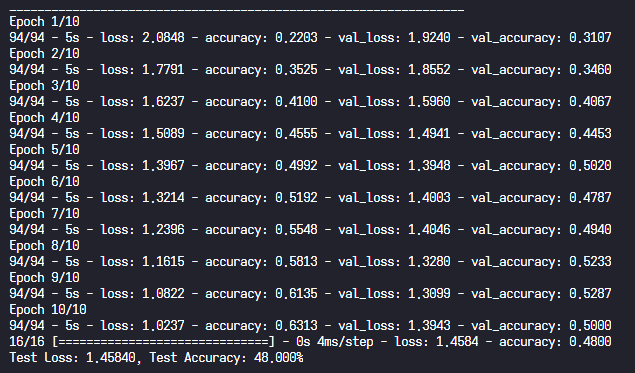

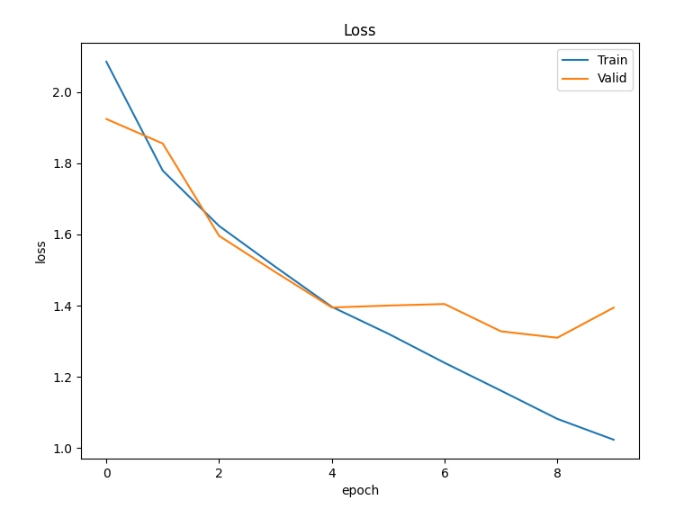

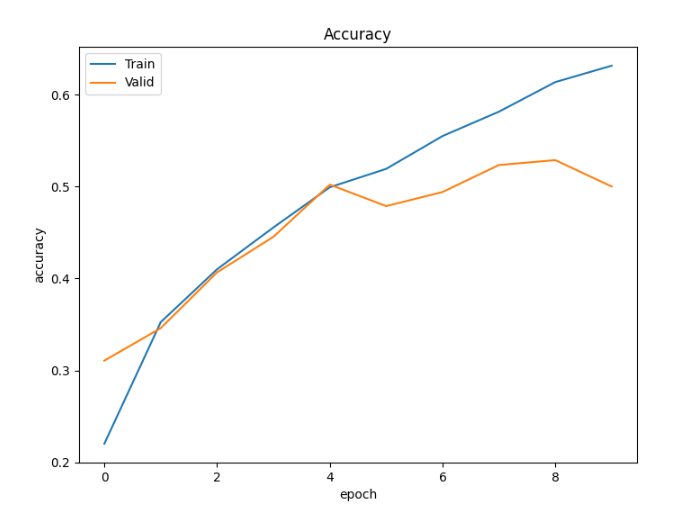